###Exploratory Data Analysis (EDA) – Titanic Dataset
##Internship Task 2
***Objective:***

Performed comprehensive EDA on the Titanic dataset using statistical analysis and advanced visualizations to extract key survival patterns and prepare features for machine learning modeling.

##Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

##Load the Dataset

In [2]:
df = pd.read_csv("titanic dataset.csv")   # use your exact file name
df.head()

,Passenger Id,Survived,P class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Basic Dataset Overview

In [22]:
df.shape


(891, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger Id  891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   P class       891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,Passenger Id,Survived,P class,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##Missing Value Analysis

In [6]:
df.isnull().sum()

,0
Passenger Id,0
Survived,0
P class,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


##Distribution Analysis using Histograms

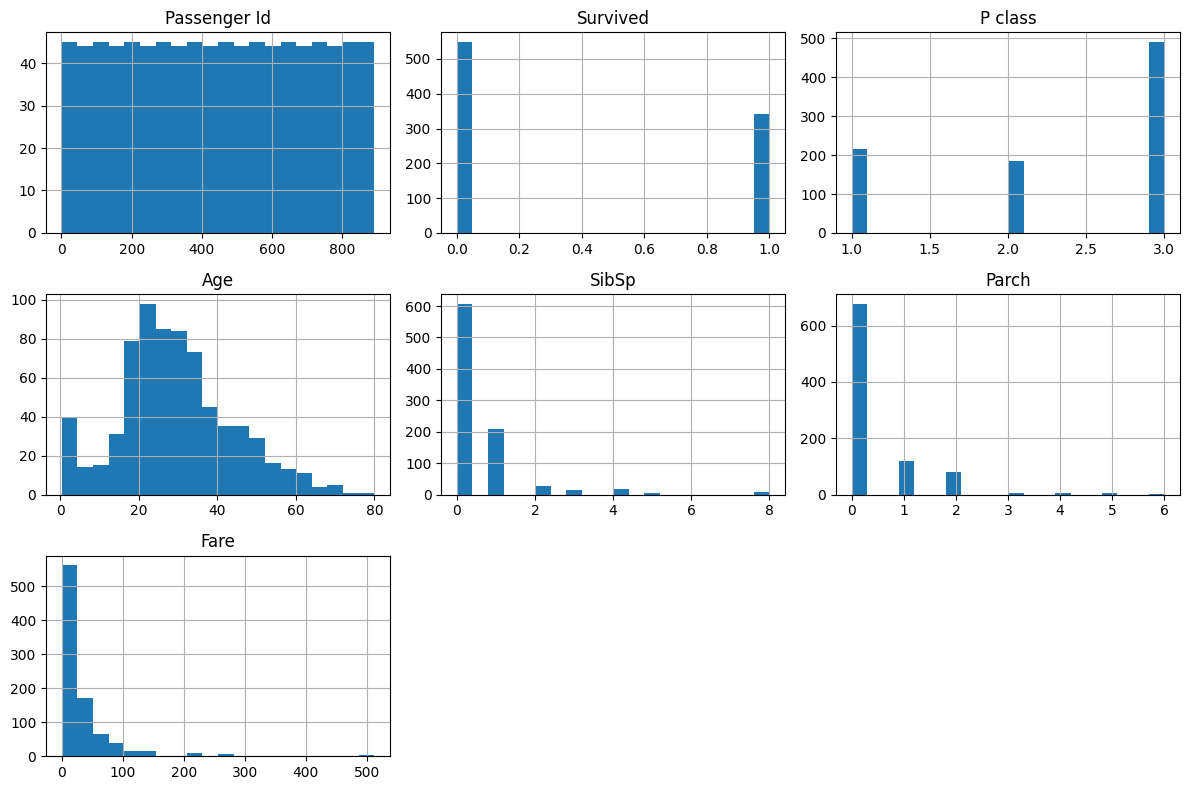

In [7]:
df.hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

##Outlier Detection using Boxplots

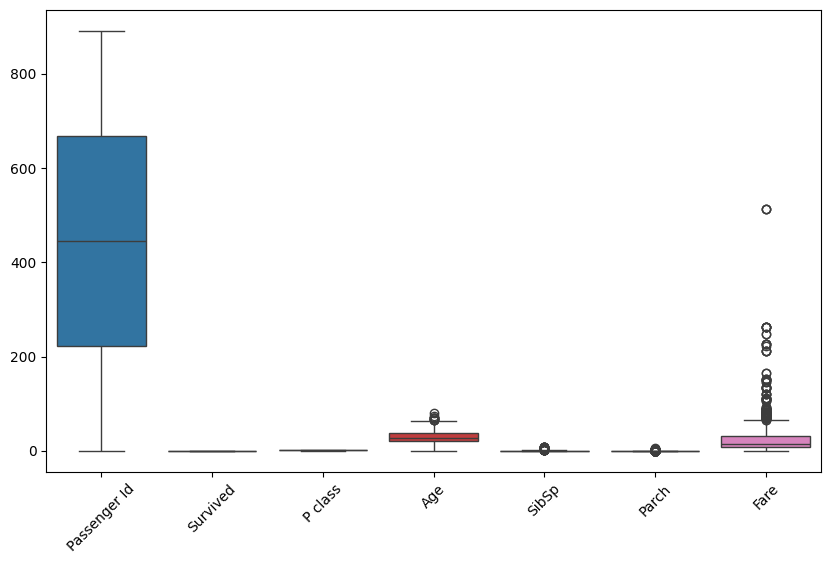

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

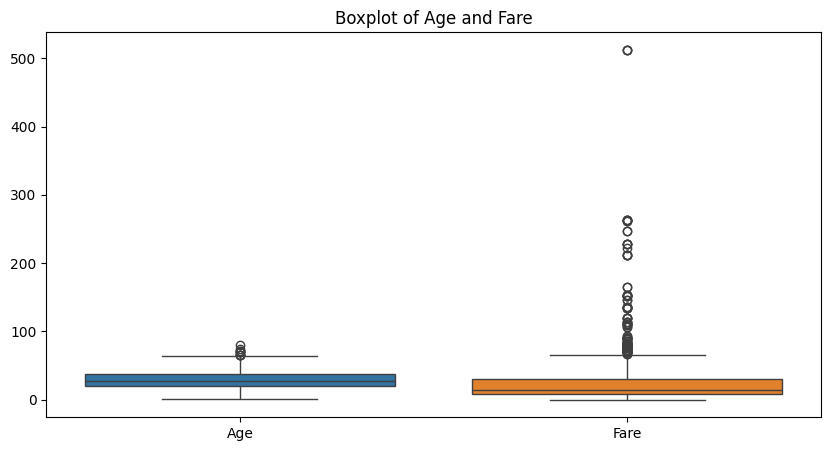

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Age','Fare']])
plt.title("Boxplot of Age and Fare")
plt.show()

##Correlation Analysis (Heatmap)

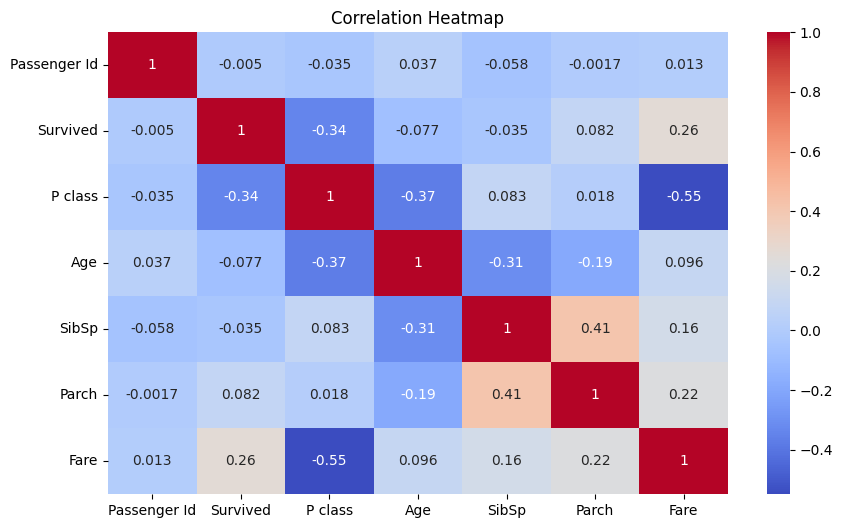

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##Feature Relationship Analysis using Pairplot

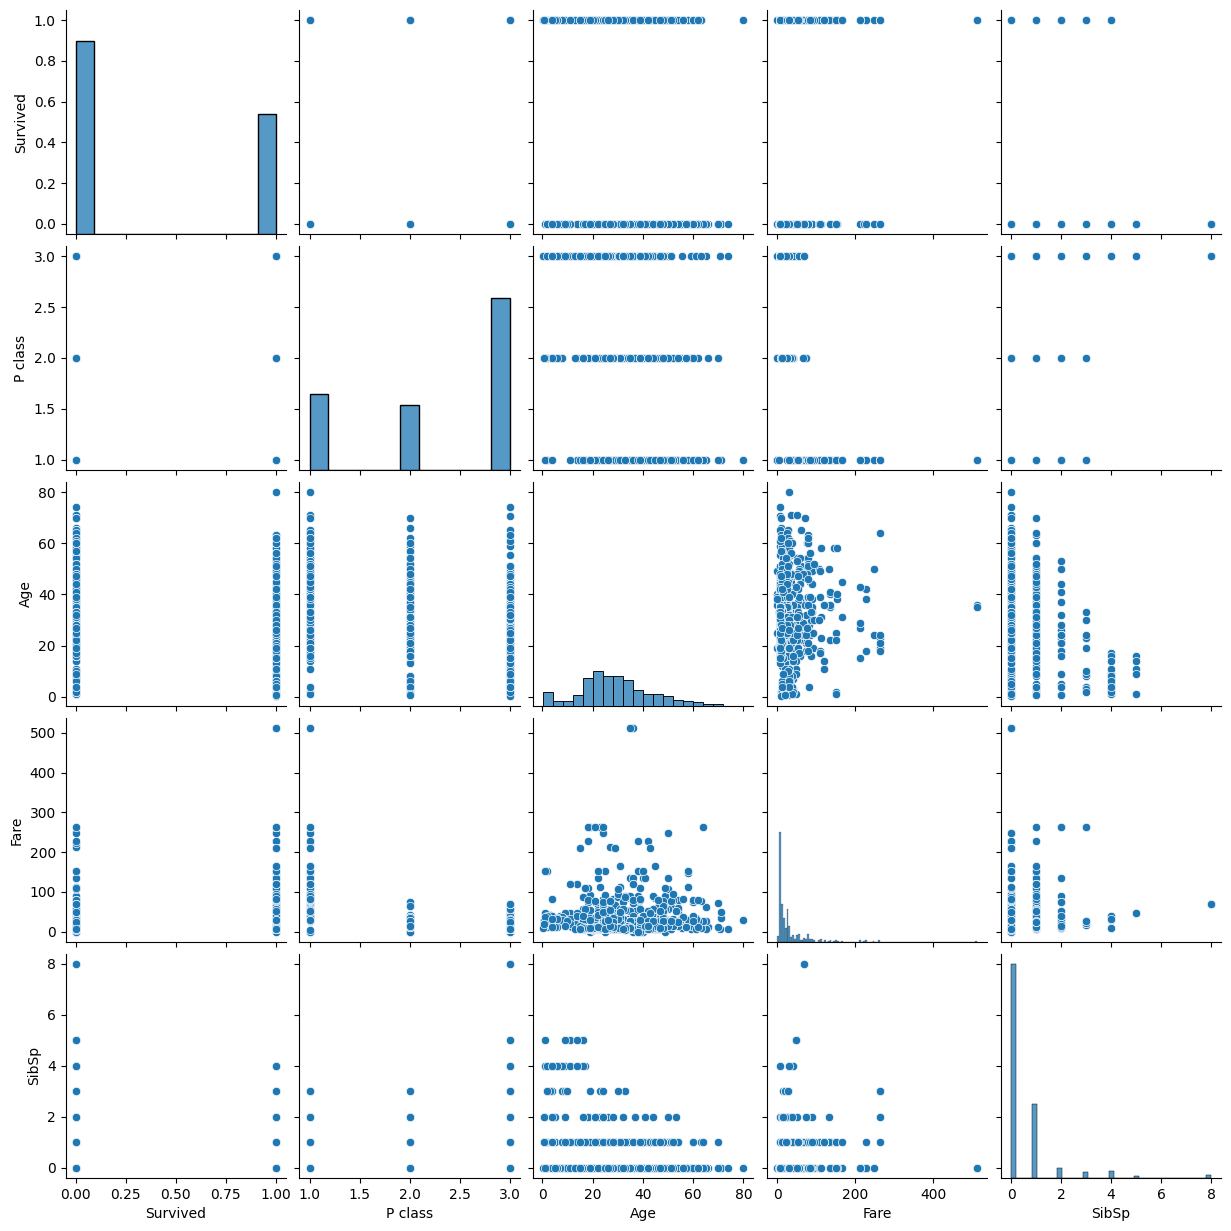

In [10]:
sns.pairplot(df[['Survived','P class','Age','Fare','SibSp']])
plt.show()

##Survival Analysis (Target Variable Exploration)

##A. Survival Count

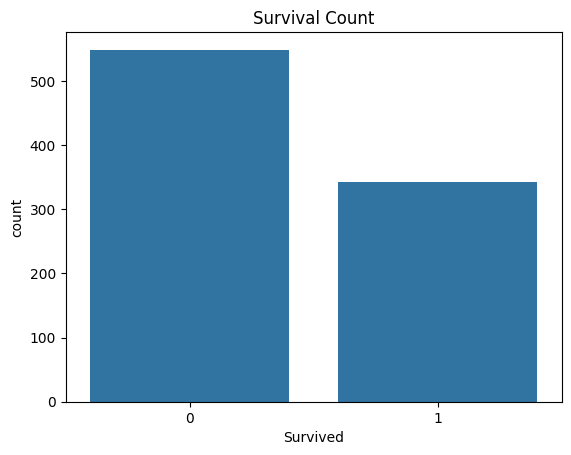

In [11]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

##B. Survival by Gender

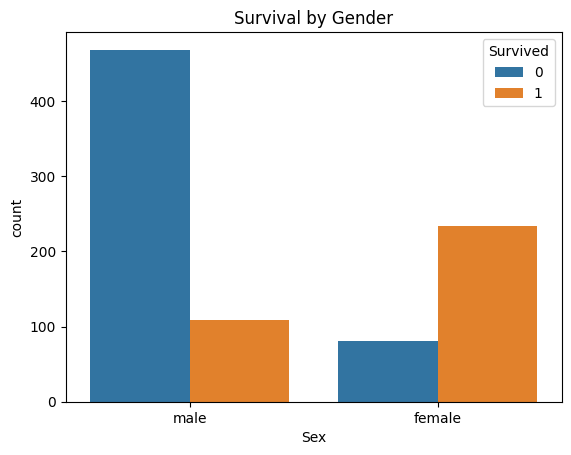

In [12]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

##C. Survival by Passenger Class

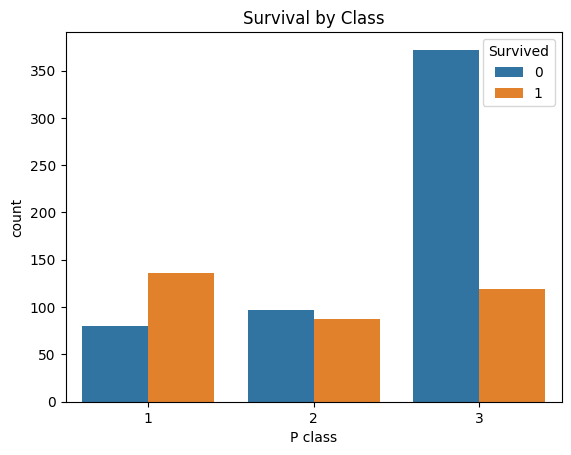

In [13]:
sns.countplot(x='P class', hue='Survived', data=df)
plt.title("Survival by Class")
plt.show()

##D. Survival by Age

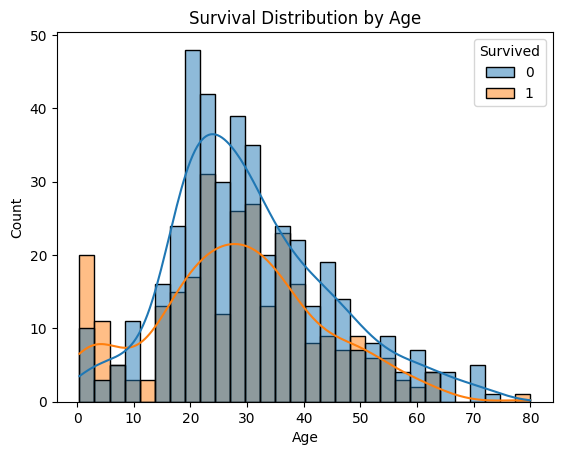

In [26]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Survival Distribution by Age")
plt.show()

##E. Survival by Family Size

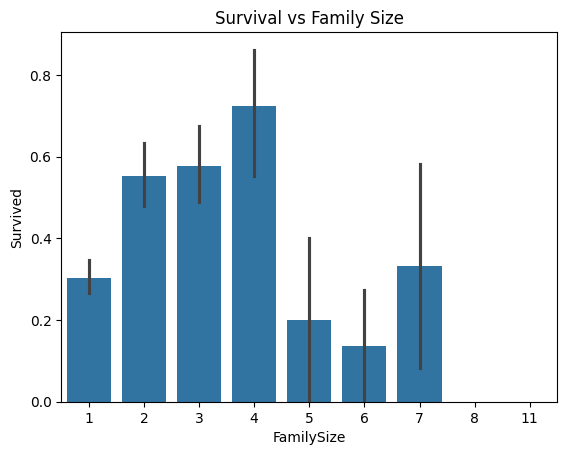

In [27]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival vs Family Size")
plt.show()

## Key Insights from EDA

- Female passengers had significantly higher survival rates.
- Passengers from higher classes (Pclass = 1) had better chances of survival.
- Children and younger passengers survived more.
- Moderate family size improved survival chances.
- Fare showed strong correlation with survival.

##Interactive Plotly Visualization



In [14]:
fig = px.histogram(df, x='Age', color='Survived', nbins=30, title="Age vs Survival")
fig.show()

In [28]:
import plotly.express as px

fig = px.histogram(df, x='Age', color='Survived',
                   title="Interactive Age Distribution by Survival")
fig.show()

In [29]:
fig = px.scatter(df, x='Age', y='Fare', color='Survived',
                 title="Fare vs Age (Survival Colored)")
fig.show()

##Violin Plots (Distribution + Density)

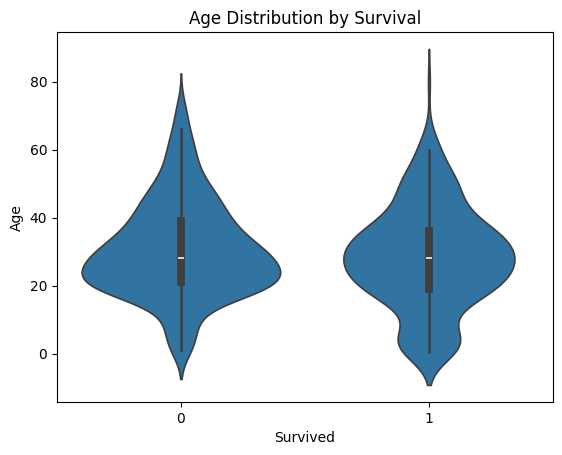

In [30]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

##Stacked Bar Chart (Class vs Survival)

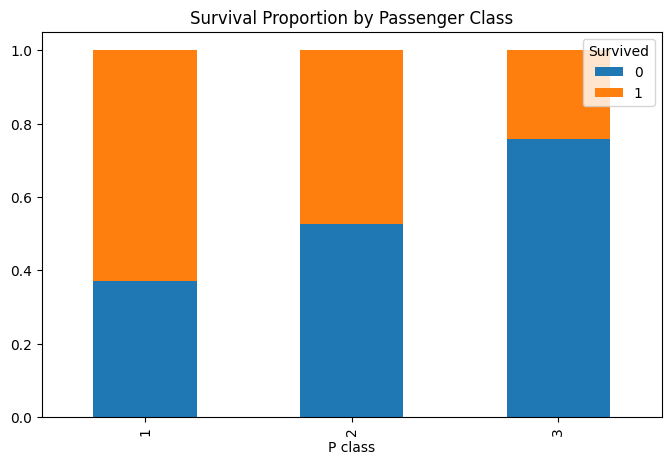

In [32]:
pd.crosstab(df['P class'], df['Survived'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(8,5))
plt.title("Survival Proportion by Passenger Class")
plt.show()

##KDE Distribution

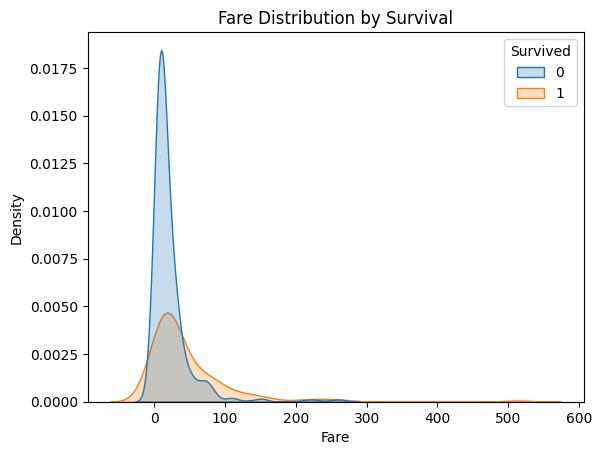

In [33]:
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True)
plt.title("Fare Distribution by Survival")
plt.show()

##Survival Rate Tables

In [15]:
df.groupby('Sex')['Survived'].mean()
df.groupby('P class')['Survived'].mean()
df.groupby('Embarked')['Survived'].mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


##Advanced Visual Storytelling

In [16]:
px.sunburst(df, path=['Sex','P class'], values='Survived',
            title='Hierarchical Survival Distribution')

##Survival Probability Heatmap

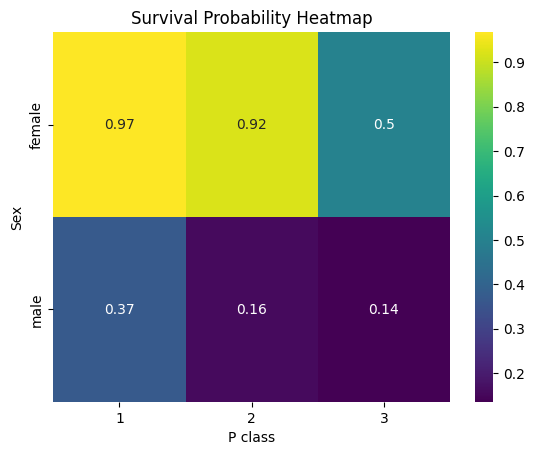

In [17]:
pivot = pd.pivot_table(df, values='Survived', index='Sex', columns='P class')
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.title("Survival Probability Heatmap")
plt.show()

##Feature Engineering

In [18]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

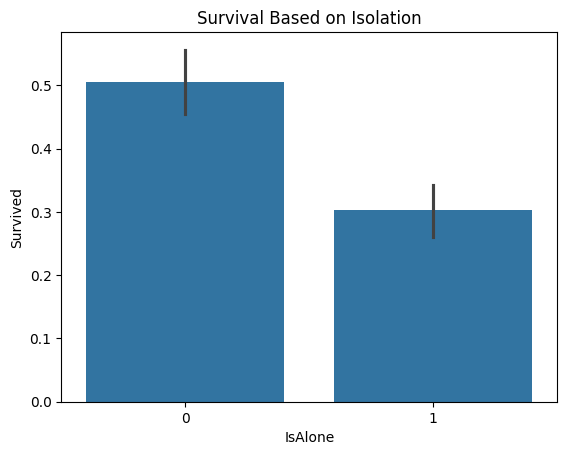

In [19]:
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title("Survival Based on Isolation")
plt.show()

##Hypothesis Testing (Chi-square)

In [37]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['Sex'], df['Survived'])
chi2, p, dof, exp = chi2_contingency(table)

print("Chi-square:", chi2)
print("P-value:", p)

#Since p-value < 0.05, we reject the null hypothesis, indicating that gender has a statistically significant relationship with survival.

Chi-square: 260.71702016732104
P-value: 1.1973570627755645e-58


##Automated EDA Report

In [38]:
pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.8 MB/s eta 0:00:00


In [39]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Titanic EDA Report", explorative=True)
profile.to_file("Titanic_EDA_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 55.82it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Business & Operational Insights

- Emergency evacuation protocols significantly influenced survival outcomes.
- Gender and passenger class played dominant roles in survival prediction.
- High-fare and premium-class passengers had priority rescue access.
- Smaller families showed higher survival probability due to easier evacuation.

####Conclusion

In this task, a comprehensive Exploratory Data Analysis (EDA) was performed on the Titanic dataset to uncover patterns, relationships, and meaningful insights.

Key observations from the analysis include:

- Female passengers had a significantly higher survival rate compared to males, reflecting the evacuation priority of "women and children first".
- Passenger class strongly influenced survival probability, with first-class passengers showing the highest survival rates.
- Younger passengers, particularly children, demonstrated better survival chances.
- Passengers traveling with small families showed higher survival rates than those traveling alone or in very large groups.
- Fare and passenger class were strongly correlated with survival outcomes, indicating socio-economic factors played an important role.

Advanced visualizations, correlation analysis, and statistical exploration provided deeper understanding of the dataset and highlighted the most influential features affecting survival.

This EDA process successfully transformed raw data into actionable insights and built a strong foundation for machine learning model development. The findings from this analysis will directly guide feature selection and model optimization in the next phase of the project.

Overall, this task strengthened practical data analysis skills and demonstrated how effective EDA plays a critical role in building robust and high-performing machine learning systems.
